# ОНОЛ
Тухайн өгөгдлийг ашиглан ямар үр дүн гаргахаас шалтгаалж машин сургалтыг "Data Mining" буюу "Өгөгдөл Олборлолт" талаас авч үзэн дараах төрлүүдэд хувааж болно [4].
  - Predictive
      - **Classification** /эр-эм, өндөр-нам, сайн-муу-дунд г.м бүлгээр ангилах - categorical/
      - Regression /10-25 г.м үргэлжилсэн тоон интервал утгуудаар ангилах - numerical/
  - Descriptive
      - Clustering
      - Association rules

## Classification      
Өмнөх хэсгээс кинонд өгсөн аливаа сэтгэгдлийг эерэг, сөрөг аль нь болохыг ангилах нь Classification төрлийн олборлолт болох нь харагдаж байна. Үүнийг хийхийн тулд одоогийн байгаа өгөгдлөөс predictive model буюу classifier-ийг үүсгэх ёстой. Энэхүү model-ийг үүсгэх хэд хэдэн алгоритмууд байдаг. Тухайлбал ZeroR, OneR, Naive Bayesian, Logistic Regression, Decision Tree, KNN, SVM,... гэх мэт. Эндээс Logistic Regression-ийг ашиглаж киноны сэтгэгдлийг автоматаар эерэг, сөргөөр нь ангилах model-оо байгуулсан.
## Logistic Regression
Binary classification буюу үр дүн нь categorical бөгөөд зөвхөн хоёр л ангилалд /0 эсвэл 1/ хуваагдах үед аливаа ангилалд харьяалагдах магадлалаар нь үнэлж model-оо байгуулах аргыг logistic regression-ы алгоритм гэнэ.

Бид $X$-ээс хамаарч $Y$ үр дүн ямар байхыг таамаглаж байгаа гэж үзвэл магадлалын $0 \leq p <1 $ нөхцлийг хангах фунц нь дараах байдалтай бичигдэнэ.

$$p=\frac{exp(\beta_0 + \beta_1X)}{exp(\beta_0 + \beta_1X) + 1}$$

Дээрх тэгшитгэлийг өөрчилж баруун талыг шугаман хэлбэрт оруулж бичвэл доорх байдалтай болно.

$$ln(\frac{p}{1-p})=\beta_0 + \beta_1X$$

Баруун талын тэнцлийн $X$-ийг олон хэмжээст /вектор/ болгон өргөтгөж, зүүн талын тэнцлийг нөхцөлт магадлалаас хамааруулсан функцээр орлуулан түүнийгээ logit хэмээн нэрлэвэл дараах байдалтай хувиргаж болох юм.

$$logit\left(p(y=1|x)\right )=\beta_0x_0+\beta_1x_1+\beta_mx_m=\sum_{i=0}^{n}\beta_mx_m = \mathbf{\beta}^Tx$$

## Туршилт
Дээр дурьдсан classification хийхэд түгээмэл ашиглагддаг logistic regression алгоритмыг хэн бүхний мэдэх Iris-Flower өгөгдөл дээр Python хэлний Scikit-Learn санг ашиглан туршив.

Бэлэн өгөгдлийг уншиж feature болон label-ийг ялгаж авав.

In [9]:
from sklearn import datasets
import numpy as np

%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Label буюу ангиллууд:', np.unique(y))

Label буюу ангиллууд: [0 1 2]


Уншиж авсан өгөгдлийн 70% train, 30% test болгон хуваав.

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Feature-уудыг стандартчилав.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Plot-ыг өнгөөр ялгах фунц

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    if test_idx:

        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('NumPy санг шинэчилнэ үү!!')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Эцэст нь Iris-Flower өгөгдлийг logistic regression-ы алгоритмаар гарган авсан classifier-аар ангилав.

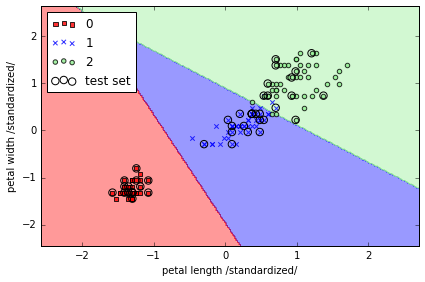

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length /standardized/')
plt.ylabel('petal width /standardized/')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()